In [ ]:
#In [1]
#importing of libraries & packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
#importing normalization package
from sklearn.preprocessing import StandardScaler         
#importing train test split
from sklearn.model_selection import train_test_split
#importing regression packages
from sklearn.linear_model import LinearRegression    
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')          
#importing mean squared error and mean absolute error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy import stats
#importing feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  RFE
from sklearn import model_selection
#importing label encoder to encode text data into their numerical factors
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   


In [ ]:
# In[2]: reading of csv files
stock_data=pd.read_csv('NIFTY50_all.csv')

In [ ]:
# in [3] dropping of column
stock_data=stock_data.drop('Date',axis=1)

In [ ]:
# In[4]: dropping of null vslues


print("The Status of null values in data : ",stock_data.isnull().values.any())
stock_data=stock_data.dropna()

print("The Status of null values in data : ",stock_data.isnull().values.any())




The Status of null values in data :  True
The Status of null values in data :  False


In [ ]:
# In[5]:
stock_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
866,MUNDRAPORT,EQ,161.45,162.10,165.70,161.25,163.50,164.00,164.08,2574106,4.223703e+13,19171.0,1271255.0,0.4939
867,MUNDRAPORT,EQ,164.00,164.00,165.15,160.15,161.15,161.25,162.17,1699298,2.755678e+13,16176.0,791462.0,0.4658
868,MUNDRAPORT,EQ,161.25,161.50,162.80,159.20,161.00,161.05,161.02,1185817,1.909361e+13,14810.0,722154.0,0.6090
869,MUNDRAPORT,EQ,161.05,160.50,161.10,159.05,160.00,159.85,160.09,546378,8.746905e+12,7071.0,386144.0,0.7067
870,MUNDRAPORT,EQ,159.85,159.85,162.75,156.35,157.00,157.25,158.52,2193466,3.477027e+13,17865.0,1425849.0,0.6500


In [ ]:
# In[6]: factorizing of symbol column and dropping column series


stock_data['Symbols']=stock_data['Symbols']=pd.factorize(stock_data.Symbol)[0]

new_data=stock_data.drop('Symbol',1)
new_data=new_data.drop('Series',1)
new_data.head(2)




,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Symbols
866,161.45,162.1,165.70,161.25,163.50,164.00,164.08,2574106,4.223703e+13,19171.0,1271255.0,0.4939,0
867,164.00,164.0,165.15,160.15,161.15,161.25,162.17,1699298,2.755678e+13,16176.0,791462.0,0.4658,0


In [ ]:
# In[9]: features selection for x and y variable
#y-target features
Y=new_data.iloc[:,new_data.columns == 'Volume'].values
#X-input features        
X=new_data.iloc[:,new_data.columns != 'Volume'].values
#Splitting the dataset into the Training and Test dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=33)




,Algorithm,RMSE,R2_Score
0,Multiple Linear Regression,4582582.52,76.58
1,Random Forest Regression,1117942.11,98.61
2,K Neighbors Regression,8438940.59,20.59
3,Decision Tree Regression,1401349.48,97.81


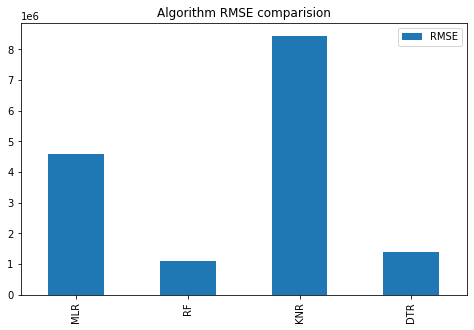

In [ ]:
# preparing models for train and test fit
models = []
models.append(('Multiple Linear Regression', LinearRegression()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('K Neighbors Regression', KNeighborsRegressor(n_neighbors=3)))
models.append(('Decision Tree Regression', DecisionTreeRegressor(random_state = 0)))

# evaluate each model in turn
rmse_scores = []
r_scores = []
names = []
predicted = []
actual = []

for name, model in models:
  
  model.fit(X_train,Y_train)
  
  #Predicting the Test set results:
  y_pred = np.round(model.predict(X_test),decimals=2)
  rmse = np.sqrt(mean_squared_error(Y_test,y_pred)) 
  r_score=r2_score(Y_test, y_pred)

  #storing value in array to be used in data frame
  predicted=y_pred
  actual=Y_test
  rmse_scores.append(np.round(rmse,2))
  r_scores.append(np.round(r_score*100,2))
  names.append(name)


df=pd.DataFrame({'Algorithm': names,'RMSE': rmse_scores, 'R2_Score': r_scores})


#Plotting RMSE of all algorithms
plotdata = pd.DataFrame({"RMSE":rmse_scores},index=['MLR','RF','KNR','DTR'])
plotdata.plot.bar(figsize=(8,5),title="Algorithm RMSE comparision")
df



In [ ]:
######################################################################################################
############################## to show oLS summarry for Multipte LR ##################################

import statsmodels.api as sm

#y-target features
Y=new_data.iloc[:,new_data.columns == 'Volume'].values
#X-input features
X=new_data.iloc[:,new_data.columns != 'Volume'].values

X_opt= X[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
#Optimal X contains the highly impacted independent variables
regressor_OLS=sm.OLS(endog = Y, exog = X_opt ).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 3.357e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:53:45   Log-Likelihood:            -2.0233e+06
No. Observations:              120344   AIC:                         4.047e+06
Df Residuals:                  120333   BIC:                         4.047e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -656.0321    182.952     -3.586      0.000   -1014.614    -297.450
x2            29.8029    430.159      0.069      0.945    -813.302     872.908
x3          -624.3913    609.030     -1.025      0.305   -1818.081     569.299
x4          1827.2510    612.634      2.983      0.003     626.498    3028.004
x5         -2516.5180    990.460     -2.541      0.011   -4457.803    -575.233
x6          2803.1003   1189.863      2.356      0.018     470.989    5135.212
x7          -927.5593   1111.896     -0.834      0.404   -3106.857    1251.739
x8         -1.447e-09   6.28e-11    -23.043      0.000   -1.57e-09   -1.32e-09
x9            50.7688      0.375    135.271      0.000      50.033      51.504
x10            1.6483      0.005    327.152      0.000       1.638       1.658
x11         -265.8243      6.870    -38.691      0.000    -279.290    -252.358
x12        -2.472e+04    638.560    -38.705      0.000    -2.6e+04   -2.35e+04
==============================================================================
Omnibus:                   203259.047   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        592992571.706
Skew:                          11.123   Prob(JB):                         0.00
Kurtosis:                     346.168   Cond. No.                     1.67e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""